---
syncID: caf9ba121b2343c7a924a5a1156e3ad1
title: "Introduction to Bidirectional Hyperspectral Reflectance Data in Python" 
description: "Learn how to read NEON AOP L3 bidirectional (BRDF-corrected) reflectance h5 data in Python and visualize spectral data."
dateCreated: 2024-04-16
authors: Bridget Hass, Shashi Konduri
contributors: Tristan Goulden
estimatedTime: 1 hour
packagesLibraries: h5py, gdal
topics: hyperspectral-remote-sensing, BRDF, HDF5, remote-sensing, reflectance
languagesTool: Python
dataProduct: DP3.30006.002
code1: https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/tutorials/Python/AOP/Hyperspectral/intro-hyperspectral/intro-refl-h5-bidirectional/intro-l3-refl-h5-brdf-corrected.ipynb
tutorialSeries: 
urlTitle: neon-brdf-refl-h5-py
---


In this introductory tutorial, we demonstrate how to read NEON AOP bidirectional hyperspectral reflectance (Level 3, tiled - <a href="https://data.neonscience.org/data-products/DP3.30006.002" target="_blank">DP3.30006.002</a>) data in Python. For a more general introduction to Hyperspectral remote sensing data in Python, please refer to the related lesson: <a href="https://www.neonscience.org/resources/learning-hub/tutorials/neon-refl-h5-py" target="_blank">NEON AOP Hyperspectral Data in HDF5 format with Python</a>, which works with the previous revision of the same reflectance data product.

In Spring 2024, AOP started producing revised (**.002**) spectrometer data products, which incorporate Bidirectional Reflectance Distribution Function (BRDF) and topographic corrections. Airborne hyperspectral data acquired in 2022 and 2023 are being processed with these corrections, and downstream Level 2 and Level 3 derived spectrometer data products (eg. vegetation and water indices, fPAR, LAI, etc.) are now generated from this bidirectional (BRDF-corrected) reflectance data. The L1 directional reflectance data will still be available under the original **.001** revision # (<a href="https://data.neonscience.org/data-products/DP1.30006.001" target="_blank">DP1.30006.001</a>). Eventually, all previous years of data (2013-2021) will also be re-processed to apply the BRDF and topographic corrections. Updates on this progress will be posted as Data Notifications on the NEON Data Portal.



The new bidirectional data includes some slight changes to the H5 contents, including some additional fields specific to the BRDF corrections. This tutorial outlines the major differences and highlights information you may want to incorporate when working with this revised data product. The tutorial also covers fundamental steps of reading in and exploring the HDF5 (h5) format that the reflectance data is delivered in. You will develop skills to explore and visualize the spectral data, and learn to make some functions for streamlining this process
.

<div id="ds-objectives" markdown="1">
    
### Learning Objectives

After completing this tutorial, you will be able to:

* Understanf the differences between the directional (DP3.30006.001) and bidirectional (DP3.30006.002) surface reflectance data and H5 conten.ts
* Use the package `h5py` and the `visititems` method to read a bidirectional reflectance HDF5 file and view data attributes.
* Read in and plot some of threflectance A ancilla_Imagery and Logsry data, including t W weatheQ qualitI indicator and thA aquisitioD da.te
* Extract and ploan RGB and False-Color image from different band combinations of the reflectance data.a.

### Install Python Packages

* **gdal** 
* **h5py**
* **json**

### Download Data

To complete this tutorial, you will download and read in surface bidirectional reflectance data collected at the NEON <a href="https://www.neonscience.org/field-sites/liro" target="_blank">Little Rock Lake (LIRO)</a> aquatic site in Wisconsin. 

You can download this data from the NEON Data portal, or by clicking the link below:

**Download the LIRO Directional Reflectance Tile:** <a href="https://storage.googleapis.com/neon-aop-provisional-products/2022/FullSite/D05/2022_LIRO_3/L3/Spectrometer/Reflectance/NEON_D05_LIRO_DP3_290000_5097000_bidirectional_reflectance.h5" class="link--button link--arrow">NEON_D05_LIRO_DP3_290000_5097000_reflectance.h5</a>

### Additional Resource
If you are new to NEON hyperspectral reflectance data, we recommend going through the tutorial series below, or at least the first lesson. This series uses the directional reflectance data (DP3.30006.001), but the same principles apply.
s- 

<a href="https://www.neonscience.org/resources/learning-hub/tutorials/introduction-hyperspectral-remote-sensing-data-python" target="_blank">Introduction to Hyperspectral Remote Sensing Data in Python</a>

More details about the surface directional reflectance data product can be found on the data product page, linked below.
- <a href="https://data.neonscience.org/data-products/DP3.30006.002" target="_blank">Spectrometer orthorectified surface bidirectional reflectance - mosaic</a>
In addition, NEON'S Airborne Observation Platform provides Algorithm Theoretical Basis Documents (ATBDs) for all of their data products. Please refer to the ATBDs below for a more in-depth understanding  ofthe reflectance daad.- <a href="https://data.neonscience.org/api/v0/documents/NEON.DOC.001288vB?inline=true" target="_blank">NEON Imaging Spectrometer Radiance to Reflectance ATBD</a>
- <a href="https://data.neonscience.org/api/v0/documents/NEON.DOC.004365vB?inline=true" target="_blank">Spectrometer Mosaic ATBD</
- <a href="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/tutorials/Python/AOP/Hyperspectral/intro-hyperspectral/intro-refl-h5-bidirectional/BRDF_Algorithm_Theoretical_Basis_Documentation.pdf" target="_blank">Topographic and BRDF Corrections for NEON Imaging 
Spectrometer-derived Reflectance Dat ATBD</a>a>

</div>


## BRDF and Topographic Corrections

### BRDF Correction
Objects appear to be different when viewed from different angles, and when illuminated from different directions. The Bidirectional Reflectance Distribution Function (BRDF) describes the directional dependence of the reflected energy of a target as a function of illumination and viewing geometry. It also depends on the wavelength and structural and optical properties of the surface. In short, the BRDF correction helps to improve continuity in brightness levels between flightlines, and helps minimize the view and illumination angle effects. 

### Topographic Correction
Steep mountain slopes can significantly affect the remote sensing of vegetation. In areas with complex terrain, slopes facing the sun receive more light and appear brighter than slopes facing away from the sun. The irradiation on a slope varies strongly with the slope azimuth relative to the sun, and the reflectance of the slope varies with the angles of incidence and exitance relative to the slope normal. The topographic correction involves standardizing the imagery for these two effects 
based on the slope of the terrain and its relative position with the sun.

### FlexBRDFslope normal. 

NEON followed the FlexBRDF approach to perform the topographic and BRDF corrections, following <a href="https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021JG006622" target="_blank">Queally et al. 2022</a>. Details of the implementation are summarized in the <a href="" target="_blank">Topographic and BRATBD Basis Document</a>. Section 4.2 and Fig 6 in the linked document provide a short summary of the approach. The BRDF correction is applied using the University of Wisconsin Environmental Spectroscopy Lab's Python-based open-source software
<a href="https://github.com/EnSpec/hytools" target="_blank">HyTools</a>. 

<figure>
    <a href="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/hyperspectral-general/BRDFcorrection.PNG">
    <img src="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/hyperspectral-general/BRDFcorrection.PNG"></a>
    <figcaption> Example dataset showing the a. original and b. BRDF-corrected datasets at the NEON CPER site; c. shows the difference in RMSE between the data processed with and without the BRDF correction.  
    </figcaption>
</figure>

## Changes to Bidirectional Reflectance HDF5 Files

If you're working with the bidirectional reflectance data for the first time, we encourage you to start by exploring the HDF5 file in HDFView, a free software that can be downloaded from the <a href="https://www.hdfgroup.org/downloads/hdfview/" target="_blank">HDF Group Download Page</a>. This provides a more interactive way to view the contents of the hdf5 files. The figure below shows a DP3.30006.002 and DP3.30006.001 file in HDFView for comparison.

<table><tr>
<td> <img src="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/hyperspectral-general/LIRO_bidirectional_refl_HDFview.png" width="500"> </td>
<td> <img src="https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/main/graphics/hyperspectral-general/SERC_directional_refl_HDFview.png" width="500"> </td>
</table>
<figcaption> HDFView of the new DP3.30006.002 (left) and original DP3.30006.001 (right). Highlighted fields on the left image indicate new or updated fields in the .002 revision.
</figcaption>

As you can see, there are some differences in the HDF5 structure between the .001 (directional) and .002 (bidirectional) datasets. The major changes are summarized below, with additional details outlined in the table.

1. Addition of an `Acquisition Date` Ancillary Image.
2. Updated `Weather Quality Index` Ancillary Image.
3. Updated Logs to use file names from the L1 reflectance, including the flight line #, with addition of the raw file name to the top level.
4. Consistency in fields for Ancillary Rasters.
5. Consistency in NO DATA values across Ancillary Rasters.
6. Addition of BRDF metadata.

| HDF Group/Field | Bidirectional Reflectance (DP3.30006.002)      | Directional Reflectance (DP3.30006.001) |
|----------|------------|-------------------------|
| Ancillary_Imagery/Acquisition_Date | New field added, including the date (YYMMDD) of each pixel | Information is derived from Data Selection Index |
| Ancillary_Imagery/Weather_Quality_Indicator | Cloud cover % data provided as 1/2/3 where 1 = <10%, 2 = 10-50%, 3=>50% | Cloud cover data provided as R/G/B color combinations where Green = <10%, Yellow = 10-50%, and Red = >50% cloud cover |
| Logs | Log file names reflect the Flight Line #, corresonding to the L1 Reflectance Tile | Log file names reflect the time stamp of the flight line |
| Logs | BRDF logs added (BRDF_COEFFS_JSON_for_Hytools and BRDF_Config_JSON_for_Hytools) | No BRDF logs |

Now that you have a high-level picture of what has changed, let's take a look at the bidirectional reflectance data in Python. 

In Python, you can look inside the HDF5 dataset with the `h5py visititems` function. The `list_dataset` function defined below displays all datasets stored in the hdf5 file and their locations within the hdf5 file:

### Set up

First let's import the required packages:

In [1]:
import os
import json
import h5py
import numpy as np
import pandas as pd
from osgeo import gdal
import matplotlib.pyplot as plt
from skimage import exposure

## Read in the bidirectional reflectance .h5 dataset
To start, make sure the NEON surface bidirectional reflectance data (DP3.30006.002) is downloaded (see instructions at the top of this lesson) and located in the data folder under your working directory. You can change the path, but make sure to update the script to point to where you've saved this file.

In [2]:
# display the contents in the ./data folder to confirm the file is in the correct location
os.listdir('./data')

['NEON_D05_LIRO_DP3_290000_5097000_bidirectional_reflectance.h5']

Let's explore the hyperspectral reflectance data. Note that if the h5 file is stored in a different directory than where you are running your notebook, you need to include the path (either relative or absolute) to the directory where that data file is stored. Use `os.path.join` to create the full path of the file. 

In [3]:
# Note that you may need to update this filepath for your local machine
h5_file = h5py.File('./data/NEON_D05_LIRO_DP3_290000_5097000_bidirectional_reflectance.h5','r')

In [4]:
#list_dataset lists the names of datasets in an hdf5 file
def list_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name)

h5_file.visititems(list_dataset)

LIRO/Reflectance/Metadata/Ancillary_Imagery/Acqusition_Date
LIRO/Reflectance/Metadata/Ancillary_Imagery/Aerosol_Optical_Thickness
LIRO/Reflectance/Metadata/Ancillary_Imagery/Aspect
LIRO/Reflectance/Metadata/Ancillary_Imagery/Cast_Shadow
LIRO/Reflectance/Metadata/Ancillary_Imagery/Dark_Dense_Vegetation_Classification
LIRO/Reflectance/Metadata/Ancillary_Imagery/Data_Selection_Index
LIRO/Reflectance/Metadata/Ancillary_Imagery/Haze_Cloud_Water_Map
LIRO/Reflectance/Metadata/Ancillary_Imagery/Illumination_Factor
LIRO/Reflectance/Metadata/Ancillary_Imagery/Path_Length
LIRO/Reflectance/Metadata/Ancillary_Imagery/Sky_View_Factor
LIRO/Reflectance/Metadata/Ancillary_Imagery/Slope
LIRO/Reflectance/Metadata/Ancillary_Imagery/Smooth_Surface_Elevation
LIRO/Reflectance/Metadata/Ancillary_Imagery/Visibility_Index_Map
LIRO/Reflectance/Metadata/Ancillary_Imagery/Water_Vapor_Column
LIRO/Reflectance/Metadata/Ancillary_Imagery/Weather_Quality_Indicator
LIRO/Reflectance/Metadata/Coordinate_System/Coordinate_

You can see that there is a lot of information stored inside this reflectance hdf5 file. Most of this information is *metadata* (data about the reflectance data), for example, this file stores input parameters used in the atmospheric correction. 

For this introductory lesson, we will explore some of these datasets, including the reflectance data (hyperspectral cube), and the corresponding geospatial information, stored in `Metadata/Coordinate_System`. 

- `Reflectance/Reflectance_Data`
- `Reflectance/Metadata/Coordinate_System/`
- `Reflectance/Metadata/Spectral_Data/Wavelength`

We will also highlight some of the new and updated datasets that differ from the previous h5 format for the directional reflectance (DP3.30006.001). These include:

- `Reflectance/Metadata/Ancillary_Imagery/Acqusition_Date`
- `Reflectance/Metadata/Ancillary_Imagery/Weather_Quality_Indicator`
- `Reflectance/Metadata/Logs/L004-1_20220623/BRDF_COEFFS_JSON_for_Hytools`
- `Reflectance/Metadata/Logs/L004-1_20220623/BRDF_Config_JSON_for_Hytools`

We can also display the name, shape, and type of each of these datasets using the `ls_dataset` function defined below, which is also called with the `visititems` method: 

In [5]:
site_name = str(list(h5_file.items())).split("'")[1]
print('site name:',site_name)
prod_name = str(list(h5_file[site_name].items())).split("'")[1] # this is the Reflectance
print('product name:',prod_name)

site name: LIRO
product name: Reflectance


The function below pulls out some spatial information about the dataset that will come in handy for plotting. Please refer to the ... lesson for more details about this spatial information.

In [6]:
def get_spatial_info(hdf5_file):
    # get the site name
    site_name = str(list(hdf5_file.items())).split("'")[1]
    product_type = str(list(hdf5_file[site_name].items())).split("'")[1] # this is the Reflectance
    base_loc = hdf5_file[site_name][product_type]
    refl_shape = base_loc['Reflectance_Data'].shape
    # create a metadata dictionary to store the relevant map information
    metadata = {}
    metadata['projection'] = base_loc['Metadata']['Coordinate_System']['Proj4'][()]
    metadata['EPSG'] = int(base_loc['Metadata']['Coordinate_System']['EPSG Code'][()])
    map_info = base_loc['Metadata']['Coordinate_System']['Map_Info'][()]
    map_info_split = str(map_info).split(",")
    # extract the resolution & convert to floating decimal number
    pixel_width = float(map_info_split[5])
    pixel_height = float(map_info_split[6])
    # extract the upper left-hand corner coordinates from map_info and cast to float
    x_min = float(map_info_split[3]) 
    y_max = float(map_info_split[4])
    # calculate the x_max and yMin values from the dimensions
    x_max = x_min + (refl_shape[1]*pixel_width) #xMax = left edge + (# of columns * x_resolution)\n",
    y_min = y_max - (refl_shape[0]*pixel_height) #yMin = top edge - (# of rows * y_resolution)\n",
    metadata['extent'] = (x_min,x_max,y_min,y_max)
    return metadata

Run this function on the LIRO dataset to see what it returns:

In [7]:
map_info = get_spatial_info(h5_file)
map_info

{'projection': b'+proj=UTM +zone=16 +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
 'EPSG': 32616,
 'extent': (290000.0, 291000.0, 5097000.0, 5098000.0)}

Now that we have the spatial information, let's start looking at the data. To start, we can pull out all the Ancillary_Imagery data into a Python dictionary as follows:

In [8]:
# create a dictionary containing the Ancillary Images
sitename = str(list(h5_file.items())).split("'")[1] # this is LIRO for this example, but if you use another dataset, this is more generic
ancillary_image_names = list(h5_file[f'{sitename}/Reflectance/Metadata/Ancillary_Imagery'].keys())
ancillary_image_paths = [f'{sitename}/Reflectance/Metadata/Ancillary_Imagery/{im}' for im in ancillary_image_names]
ancillary_images = [h5_file[path][()] for path in ancillary_image_paths]
anc_image_dict = dict(zip(ancillary_image_names,ancillary_images))
# display the dictionary
anc_image_dict

{'Acqusition_Date': array([[20220623, 20220623, 20220623, ..., 20220623, 20220623, 20220623],
        [20220623, 20220623, 20220623, ..., 20220623, 20220623, 20220623],
        [20220623, 20220623, 20220623, ..., 20220623, 20220623, 20220623],
        ...,
        [20220623, 20220623, 20220623, ..., 20220623, 20220623, 20220623],
        [20220623, 20220623, 20220623, ..., 20220623, 20220623, 20220623],
        [20220623, 20220623, 20220623, ..., 20220623, 20220623, 20220623]]),
 'Aerosol_Optical_Thickness': array([[194., 194., 194., ..., 200., 200., 200.],
        [194., 194., 194., ..., 200., 200., 200.],
        [194., 194., 194., ..., 200., 200., 200.],
        ...,
        [161., 161., 161., ..., 211., 211., 211.],
        [161., 161., 161., ..., 211., 211., 211.],
        [161., 161., 161., ..., 211., 211., 211.]], dtype=float32),
 'Aspect': array([[261.08093 , 246.32469 , 240.37682 , ...,  86.42367 ,  93.01279 ,
          90.      ],
        [245.40097 , 226.64857 , 225.40874 , 

## Weather Quality Indicator

One of the most critical factors impacting the data quality are the weather conditions during the flight. While AOP strives to collect in optimal conditions, this is not always possible.

The weather quality indicator includes information about the cloud conditions during the flight, as reported by the flight operators, where 1 corresponds to < 10% cloud cover, 2 corresponds to 10-50% cloud cover, and 3 corresponds to > 50% cloud cover. We recommend using only clear-sky data (1) for a typical analysis, as it comprises the highest quality reflectance data. In higher cloud-cover conditions, clouds could be obscuring the sun and the level of uncertainty in the reflectance values will increase.

Previously, in rev .001, the Weather Quality Indicator was provided as an RGB band combination, corresponding to AOP's "stop-light" color convention, where green (0,255,0) = 0-10%, yellow (255,255,0) = 10-50%, and red (255,0,0) = 50-100%. This has been simplified in rev .002, to use a simpler 1,2,3 convention.

Let's start by plotting the weather quality data (cloud conditions) for the LIRO tile. The code below has some extra formatting features to apply colors using the stoplight color codes, just for visualization.

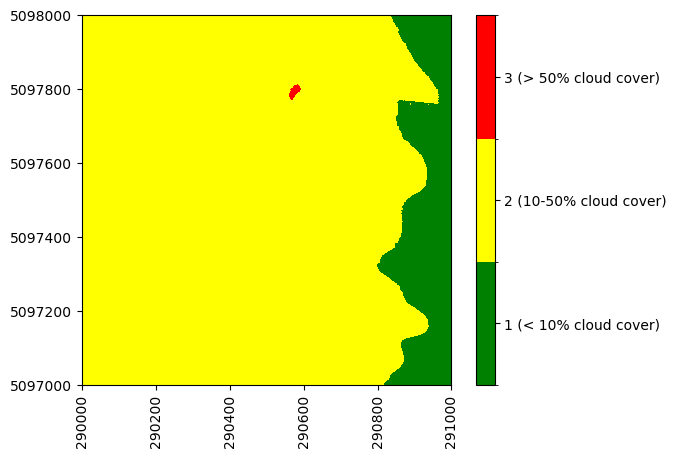

In [9]:
# Plot the Weather Quality Indicator with 1 as green, 2 as yellow, and 3 as red
wqi_data = anc_image_dict['Weather_Quality_Indicator']

# Create a colormap
cmap = plt.cm.colors.ListedColormap(['green', 'yellow', 'red'])

# Create a normalize object the describes the limits of each color
bounds = [0.5, 1.5, 2.5, 3.5]
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

# Plot the data
plt.imshow(wqi_data, extent=map_info['extent'], cmap=cmap, norm=norm)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain'); #do not use scientific notation for ticklabels
rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90); #rotate x tick labels 90 degrees

# Create a colorbar
cbar = plt.colorbar()
cbar.set_ticks([1, 2, 3])
cbar.set_ticklabels(['1 (< 10% cloud cover)', '2 (10-50% cloud cover)', '3 (> 50% cloud cover)'])

plt.show()

The mosaicking routine which generates the tiled reflectance data first selects the cloud-free pixels, then chooses the nadir-most pixels. In a single tile, there may be different cloud conditions represented, as shown in this example.

## Acquisition Date

You may be interested in the date at which a given pixel was acquired, in order to link the data with ground data, or satellite data, for example. Previously, the acquisition date had to be determined from the `Data_Selection_Index` dataset. The acquisition date is now being provided more directly (and the Data Selection Index is still provided, and is useful if you would like to pull more detail than just the date). This Data Selection Index links each pixel with the flight log that was used to generate that pixel. 

You can see the unique flight dates that are represented in this tile as follows:

In [10]:
liro_flight_dates = anc_image_dict['Acqusition_Date']
print(f'Flight dates in this tile: {np.unique(liro_flight_dates[()])}')

Flight dates in this tile: [20220617 20220623]


## Plotting Other Ancillary Imagery

The function below is a more generic function for plotting any of the ancillary datasets. You may wish to customize it, as the code chunks above have, to highlight the information more clearly.

In [11]:
def plot_ancillary_data(dataset,colorlimit,title):
    plot = plt.imshow(dataset,extent=map_info['extent'],cmap='Greys',clim=colorlimit); ax = plt.gca()
    ax.ticklabel_format(useOffset=False, style='plain'); #do not use scientific notation for ticklabels
    rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90); #rotate x tick labels 90 degrees
    cbar = plt.colorbar(plot,aspect=40); 
    cbar.set_label('',rotation=90,labelpad=20)
    plt.title(title);

Try this out on the Slope dataset, or others of your choice.

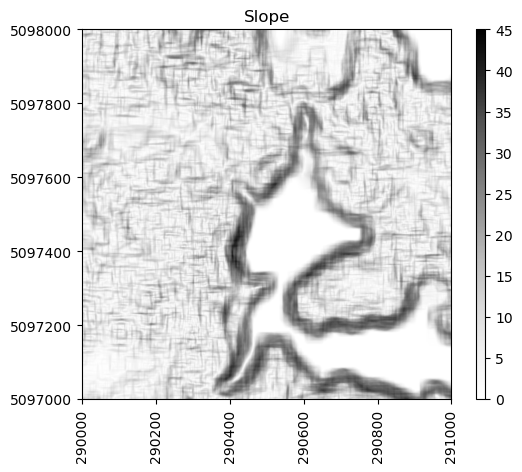

In [12]:
plot_ancillary_data(anc_image_dict['Slope'],colorlimit=(0,45),title='Slope')

## BRDF Correction Parameters
Next let's take a quick look at the new BRDF Logs. These provide information about the coefficients and configuration files used in applying the BRDF correction as outlined in the BRDF correction ATBD. 

### BRDF Configuration JSON
Table 2 in the BRDF correction ATBD lists the definitions for the user-defined parameters that go into the FlexBRDF approach, which is also the same information provided in the config.json file. This information is stored within the reflectance metadata in the "Logs" for each flightline, and can be accessed in Python as follows:

In [13]:
# BRDF Configuration
brdf_config = h5_file['LIRO/Reflectance/Metadata/Logs/L004-1_20220623/BRDF_Config_JSON_for_Hytools'][()]
# use json.loads to read this in as a dictionary object
brdf_config_dict = json.loads(brdf_config.decode("utf-8"))
# display just the first 3 items to see the file contents
list(brdf_config_dict.items())[:3]

[('bad_bands', [[300, 400], [1337, 1430], [1800, 1960], [2450, 2600]]),
 ('file_type', 'envi'),
 ('input_files',
  ['D:\\2022\\FullSite\\D05\\2022_LIRO_3\\L1\\Spectrometer\\Reflectance\\2022062313\\NEON_D05_LIRO_DP1_20220623_160816_directional_reflectance',
   'D:\\2022\\FullSite\\D05\\2022_LIRO_3\\L1\\Spectrometer\\Reflectance\\2022062313\\NEON_D05_LIRO_DP1_20220623_161211_directional_reflectance',
   'D:\\2022\\FullSite\\D05\\2022_LIRO_3\\L1\\Spectrometer\\Reflectance\\2022062313\\NEON_D05_LIRO_DP1_20220623_161637_directional_reflectance',
   'D:\\2022\\FullSite\\D05\\2022_LIRO_3\\L1\\Spectrometer\\Reflectance\\2022062313\\NEON_D05_LIRO_DP1_20220623_162028_directional_reflectance',
   'D:\\2022\\FullSite\\D05\\2022_LIRO_3\\L1\\Spectrometer\\Reflectance\\2022062313\\NEON_D05_LIRO_DP1_20220623_162431_directional_reflectance',
   'D:\\2022\\FullSite\\D05\\2022_LIRO_3\\L1\\Spectrometer\\Reflectance\\2022062313\\NEON_D05_LIRO_DP1_20220623_162845_directional_reflectance',
   'D:\\2022\\Ful

### BRDF Coefficients JSON
The BRDF coefficients provided in the `BRDF_COEFFS_JSON_for_Hytools` refer to `f_iso`, `f_geo`, and `f_vol` in Equation 11 in the BRDF correction ATBD. BRDF effects (and the value of those three coefficients) vary by vegetation type and by wavelength. In the absence of a site-specific landcover map, the FlexBRDF approach uses NDVI as a proxy for characterizing the vegetation type. To characterize the vegetation diversity, it stratifies the entire range of NDVI values for a site into 18 bins dynamically such that each bin has roughly the same number of pixels (# of bins and dynamic binning approach are user-defined parameters in the config file). This binning is carried out separately for each of the 426 wavelength bands. The coefficients file provides the value of three coefficients used for each of the 18 NDVI bins for each of the 426 bands. The Python code chunk below demonstrates how to access these coefficients for a single flightline. 

In [14]:
# BRDF Coefficients
brdf_coeffs = h5_file['LIRO/Reflectance/Metadata/Logs/L004-1_20220623/BRDF_COEFFS_JSON_for_Hytools'][()]
# use json.loads to read this in as a dictionary object
brdf_coeffs_dict = json.loads(brdf_coeffs.decode("utf-8"))
# display just the first 10 items to see the beginning of the file contents
list(brdf_coeffs_dict.items())[:10]
# brdf_coeffs_dict # optionally display the full dictionary

[('solar_zn_type', 'scene'),
 ('type', 'flex'),
 ('grouped', True),
 ('geometric', 'li_sparse'),
 ('volume', 'ross_thick'),
 ('b/r', 10),
 ('h/b', 2),
 ('sample_perc', 0.1),
 ('interp_kind', 'linear'),
 ('calc_mask',
  [['ndi', {'band_1': 850, 'band_2': 660, 'min': 0.1, 'max': 1.0}]])]

This BRDF correction information may be useful to gain a better understanding of the BRDF implementation. Optionally, you may wish to carry out your own BRDF correction in HyTools with different parameters, starting from NEON's L1 reflectance data, so this would be the place to check what was used in the NEON data products.

## Reflectance Data

Finally, let's read in and plot the reflectance data.

In [15]:
refl_array = h5_file['LIRO/Reflectance/Reflectance_Data']

The function below stacks three bands of the reflectance data and rescales from 0 to 255 so it can be displayed properly.

In [16]:
def stack_rgb(refl_array,bands):
    red = refl_array[:,:,bands[0]-1]
    green = refl_array[:,:,bands[1]-1]
    blue = refl_array[:,:,bands[2]-1]
    stacked_rgb = np.stack((red,green,blue),axis=2)
    rescaled_rgb = ((stacked_rgb - stacked_rgb.min()) * (1/(stacked_rgb.max() - stacked_rgb.min()) * 255)).astype('uint8')
    return rescaled_rgb

In [ ]:
Let's run this on the reflectance data, using bands in the visiRed, Green, and Blue bands (58, 34, and 19).

In [ ]:
refl_rgb = stack_rgb(refl_array,(58,34,19))
plt.imshow(refl_rgb,extent=map_info['extent']);

This is a little dark. We can use the `skimage.exposure` to rescale, or lighten this up a bit. Let's define another function that includes this feature.

You can see this image is a little dark. The function incorporates the `skimage.exposure` to rescale, or lighten up the data. It also adds in some other handy plotting features like a plot title.

In [ ]:
def plot_refl_rgb(rgb_array,ext,ls_pct=5,plot_title=''):   
    p_low, p_high = np.percentile(rgb_array[~np.isnan(rgb_array)], (ls_pct,100-ls_pct))
    img_rescale = exposure.rescale_intensity(rgb_array, in_range=(p_low,p_high))
    img_rescale = exposure.rescale_intensity(rgb_array, in_range=(p_low,p_high))
    plt.imshow(img_rescale,extent=ext)
    plt.title(plot_title); 
    ax = plt.gca(); ax.ticklabel_format(useOffset=False, style='plain') 
    rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) 

In [ ]:
refl_rgb = stack_rgb(refl_array,(58,34,19))
plot_refl_rgb(refl_rgb,ext=map_info['extent'],ls_pct=.1,plot_title="LIRO Reflectance RGB Image")

You can also plot a different 3-band combination, like a Color Infrared (CIR) image.

In [ ]:
refl_cir = stack_rgb(refl_array,(90,34,19))
plot_refl_rgb(refl_cir,ext=map_info['extent'],ls_pct=.5,plot_title="LIRO Reflectance Color Infrared Image")